In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA = df_DA.dropna(subset=['salary_year_avg'])

df_DA_exploded = df_DA.explode('job_skills')

df_DA_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [13]:
df_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

df_job_count=len(df_DA)

df_DA_skills['skill_percentage'] = df_DA_skills['skill_count']/df_job_count * 100

df_DA_skills = df_DA_skills.head(12)

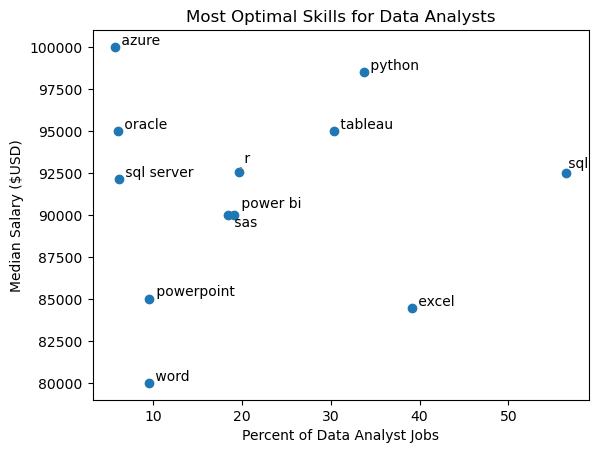

In [14]:
from adjustText import adjust_text

plt.scatter(df_DA_skills['skill_percentage'], df_DA_skills['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts')

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percentage'].iloc[i], df_DA_skills['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()